# Import Library

In [5]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import cv2
import os
import itertools
from imutils import paths
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import warnings
warnings.filterwarnings("ignore")

# Menyiapkan Dataset

In [6]:
# Menentukan path untuk training validating, dan testing dataset
training_path = r"Inception/training"
print(f"List nama folder pada dataset training:\n{os.listdir(training_path)}")

validate_path = r"Inception/validasi"
print(f"List nama folder pada dataset validasi:\n{os.listdir(validate_path)}")

test_path = r"Inception/testing"
print(f"List nama folder pada dataset testing:\n{os.listdir(test_path)}")

List nama folder pada dataset training:
['coffee_bean', 'non_coffee']
List nama folder pada dataset validasi:
['coffee_bean', 'non_coffee']
List nama folder pada dataset testing:
['coffee_bean', 'non_coffee']


In [7]:
# Menentukan ukuran target untuk gambar dan label penyakit mata
target_image_size = (299, 299)
eye_detect_labels = {
    "coffee_bean": 0,
    "non_coffee": 1 
}

# Fungsi untuk Memuat & Visualisasi Dataset

In [8]:
# Fungsi untuk memuat dataset
def load_image_dataset(data_path, target_image_size, dict_labels, shuffle_data=True):
    x = []
    labels = []
    image_paths = sorted(list(paths.list_images(data_path)))
    for image_path in image_paths:
        img = cv2.imread(image_path)
        img = cv2.resize(img, target_image_size)
        x.append(img)
        label = image_path.split(os.path.sep)[-2]
        labels.append(dict_labels[label])
    if shuffle_data:
        x, labels = shuffle(x, labels, random_state=42)
    input_shape = (target_image_size[0], target_image_size[1], 3)
    return x, labels, input_shape

In [9]:
# Memuat training dataset dengan shuffling
x_train, y_train, input_shape = load_image_dataset(training_path, target_image_size, eye_detect_labels, shuffle_data=True)

# Memuat validating dataset dengan shuffling
x_val, y_val, _ = load_image_dataset(validate_path, target_image_size, eye_detect_labels, shuffle_data=True)

# Memuat testing dataset tanpa shuffling
x_test, y_test, _ = load_image_dataset(test_path, target_image_size, eye_detect_labels, shuffle_data=False)

In [10]:
# Output Data untuk training dataset
print(f"Training Data\n1. X shape\t: {np.array(x_train).shape}")
print(f"2. Total Class\t: {len(np.unique(y_train))}")
print(f"3. Total Data\t: {len(y_train)}")
print(f"4. Input Shape\t: {input_shape}")

Training Data
1. X shape	: (5200, 299, 299, 3)
2. Total Class	: 2
3. Total Data	: 5200
4. Input Shape	: (299, 299, 3)


In [11]:
# Hitung jumlah data per label pada training dataset
unique, counts = np.unique(y_train, return_counts=True)
print(f"Data Training per Label:")
for i, (label, count) in enumerate(eye_detect_labels.items()):
    print(f"\t{label}\t: {counts[i]}")

print(f"Total Data Training\t: {len(y_train)}")

# Visualisasi bar chart dengan plotly data training dataset per label
# Define custom colors for each label
colors = ['blue', 'orange'] 

fig = go.Figure(data=[go.Bar(
    x=list(eye_detect_labels.keys()),
    y=counts,
    marker_color=colors,  # Assign colors to bars
    text=counts,  # Add text labels
    textposition='auto'  
)])
fig.update_layout(
    title_text="Data Training per Label",
    xaxis_title="Label",
    yaxis_title="Jumlah Data",
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
)
fig.show()


Data Training per Label:
	coffee_bean	: 2153
	non_coffee	: 3047
Total Data Training	: 5200


In [12]:
# Output untuk validation dataset
print(f"\nValidation Data\n1. X shape\t: {np.array(x_val).shape}")
print(f"2. Total Class\t: {len(np.unique(y_val))}")
print(f"3. Total Data\t: {len(y_val)}")
print(f"4. Input Shape\t: {input_shape}")


Validation Data
1. X shape	: (603, 299, 299, 3)
2. Total Class	: 2
3. Total Data	: 603
4. Input Shape	: (299, 299, 3)


In [13]:
# Hitung jumlah data per label pada validating dataset
unique, counts = np.unique(y_val, return_counts=True)
print(f"Data Validating per Label:")
for i, (label, count) in enumerate(eye_detect_labels.items()):
    print(f"\t{label}\t: {counts[i]}")

print(f"Total Data Validating\t: {len(y_val)}")

# Visualisasi bar chart dengan plotly data validating dataset per label
# Define custom colors for each label
colors = ['blue', 'orange', 'purple', 'green', 'red'] 

fig = go.Figure(data=[go.Bar(
    x=list(eye_detect_labels.keys()),
    y=counts,
    marker_color=colors,  # Assign colors to bars
    text=counts,  # Add text labels
    textposition='auto'  
)])
fig.update_layout(
    title_text="Validating per Label",
    xaxis_title="Label",
    yaxis_title="Jumlah Data",
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
)
fig.show()

Data Validating per Label:
	coffee_bean	: 182
	non_coffee	: 421
Total Data Validating	: 603


In [14]:
# Output untuk testing dataset
print(f"Testing Data\n1. X shape\t: {np.array(x_test).shape}")
print(f"2. Total Class\t: {len(np.unique(y_test))}")
print(f"3. Total Data\t: {len(y_test)}")
print(f"4. Input Shape\t: {input_shape}")

Testing Data
1. X shape	: (204, 299, 299, 3)
2. Total Class	: 2
3. Total Data	: 204
4. Input Shape	: (299, 299, 3)


In [15]:
# Hitung jumlah data per label pada testing dataset
unique, counts = np.unique(y_test, return_counts=True)
print(f"Data Testing per Label:")
for i, (label, count) in enumerate(eye_detect_labels.items()):
    print(f"\t{label}\t: {counts[i]}")

print(f"Total Data Testing\t: {len(y_test)}")

# Visualisasi bar chart dengan plotly data testing dataset per label
# Define custom colors for each label
colors = ['blue', 'orange', 'purple', 'green', 'red'] 

fig = go.Figure(data=[go.Bar(
    x=list(eye_detect_labels.keys()),
    y=counts,
    marker_color=colors,  # Assign colors to bars
    text=counts,  # Add text labels
    textposition='auto'  
)])
fig.update_layout(
    title_text="Data Testing per Label",
    xaxis_title="Label",
    yaxis_title="Jumlah Data",
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
)
fig.show()

Data Testing per Label:
	coffee_bean	: 100
	non_coffee	: 104
Total Data Testing	: 204


# Fungsi untuk Visualisasi Gambar Dataset

In [16]:
# Fungsi visualisasi gambar dengan label
def image_vizualize(batch_image, labels, num_image, eye_detect_labels):
    plt.figure(figsize=(15, 18))
    
    # Ambil acak indeks untuk memilih gambar
    index = random.sample(range(len(batch_image)), num_image)
    
    for i, n in enumerate(index):
        # Convert BGR ke RGB
        rgb_image = cv2.cvtColor(batch_image[n], cv2.COLOR_BGR2RGB)
        
        plt.subplot(num_image // 5 + 3, 5, i + 1)
        plt.imshow(rgb_image)
        plt.axis('off')
        img_height, img_width, _ = batch_image[n].shape
        plt.title(np.array(list(eye_detect_labels.keys()))[to_categorical(labels, num_classes=len(np.unique(labels)))[n] == 1][0].title() + f'\n({img_width}px x {img_height}px)')
        plt.subplots_adjust(hspace=0.5)

    plt.tight_layout()
    plt.show()

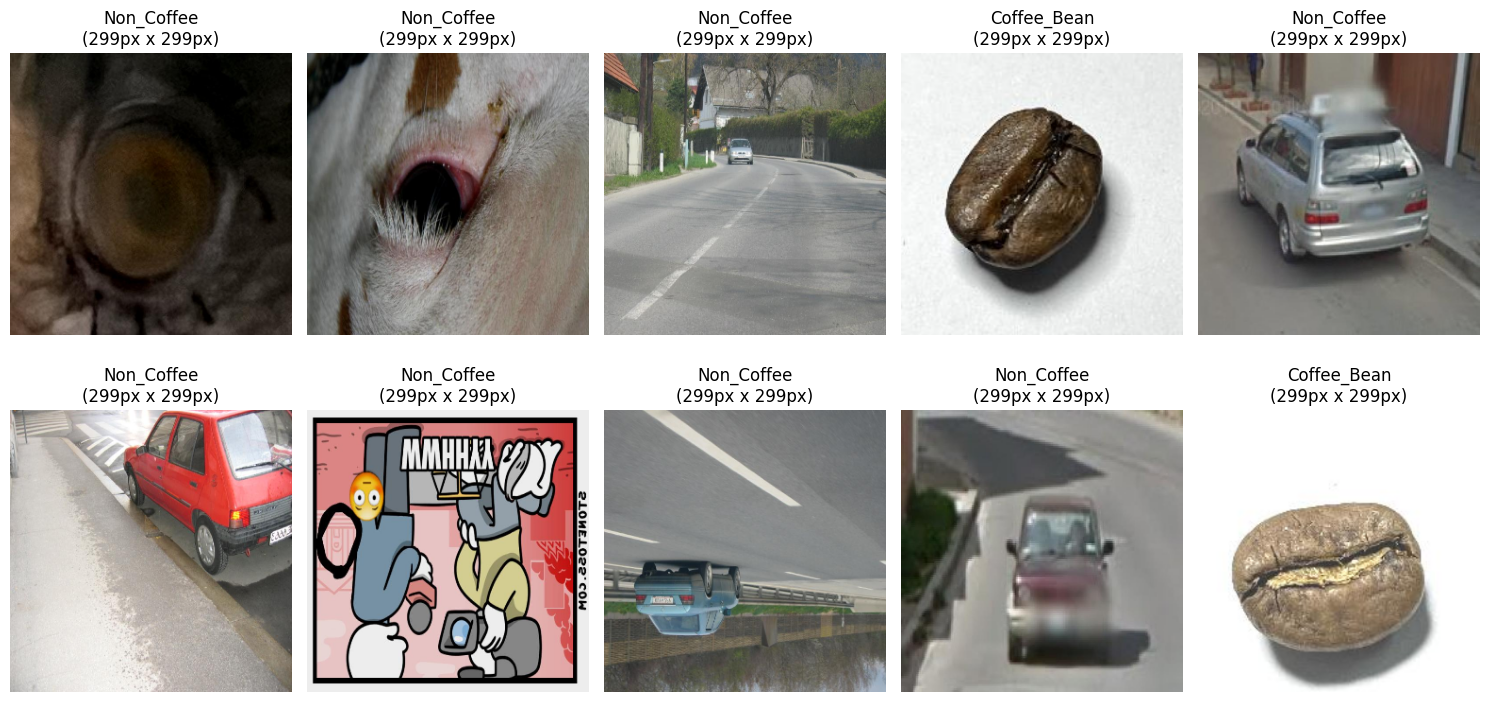

In [17]:
# Visualisasi 10 Dataset Secara Random
image_vizualize(x_train, y_train, 10, eye_detect_labels)

# Fungsi untuk Mempersiapkan Data untuk CNN

In [20]:
# Fungsi mempersiapkan data untuk training CNN
def data_preparation_training(training_path, validate_path, test_path, target_image_size):
    training = ImageDataGenerator(
        preprocessing_function=tf.keras.applications.inception_v3.preprocess_input,
        fill_mode='nearest',
        horizontal_flip=True,
        vertical_flip=False
    )  
    training_generator = training.flow_from_directory(
        directory=training_path,
        target_size=target_image_size,
        batch_size=32,
        class_mode="categorical",
        classes=["coffee_bean", "non_coffee"],
        shuffle=True
    )
    
    validate = ImageDataGenerator(
        preprocessing_function=tf.keras.applications.inception_v3.preprocess_input,
        fill_mode='nearest',
        horizontal_flip=True,
        vertical_flip=False
    )

    validate_generator = validate.flow_from_directory(
        directory=validate_path,
        target_size=target_image_size,
        batch_size=32,
        class_mode="categorical",
        classes=["coffee_bean", "non_coffee"],
        shuffle=True
    )

    test = ImageDataGenerator(
        preprocessing_function=tf.keras.applications.inception_v3.preprocess_input
    )

    test_generator = test.flow_from_directory(
        directory=test_path,
        target_size=target_image_size,
        batch_size=32,
        classes=["coffee_bean", "non_coffee"],
        class_mode="categorical",
        shuffle=False
    )
    
    return training_generator, validate_generator, test_generator


In [21]:
# Panggil fungsi data_preparation_training
training_generator, validate_generator, test_generator = data_preparation_training(training_path, validate_path, test_path, target_image_size)

Found 5200 images belonging to 2 classes.
Found 603 images belonging to 2 classes.
Found 204 images belonging to 2 classes.


# Fungsi untuk Generate Data dan Train Model

In [22]:
# Fungsi untuk training model menggunakan Inceptionv3 dengan generator

def training_model(training_generator, validate_generator, epochs=20):
    
    # Pengaturan ukuran gambar
    image_height = 299
    image_width = 299
    image_shape = (image_height, image_width, 3)

    # Menggunakan InceptionV3 sebagai base model
    base_model = tf.keras.applications.InceptionV3(
        input_shape=image_shape,
        include_top=False,
        weights='imagenet'
    )

    # Membuat layer pada base_model menjadi tidak dapat dilatih
    for layer in base_model.layers:
        layer.trainable = False

    # Definisikan model
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=2, activation='softmax'))
    model.compile(
        optimizer=RMSprop(learning_rate=1e-4),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Latih model dengan data training dan validasi
    history = model.fit(
        training_generator,
        validation_data=validate_generator,
        epochs=epochs,
        verbose=1,
        steps_per_epoch=len(training_generator),
        validation_steps=len(validate_generator)
    )
    return history, model

In [23]:
# List kosong untuk menyimpan values
training_metrics = []
validate_metrics = []
all_classification_reports = []
all_confusion_matrix = []

In [24]:
# Train the model
history, trained_model = training_model(training_generator, validate_generator, epochs=10)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.9960 - loss: 0.0232 - val_accuracy: 1.0000 - val_loss: 6.4595e-04
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 1.0000 - loss: 3.8348e-04 - val_accuracy: 1.0000 - val_loss: 2.3211e-04
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 1.0000 - loss: 1.6796e-04 - val_accuracy: 1.0000 - val_loss: 1.5861e-04
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 1.0000 - loss: 1.0961e-04 - val_accuracy: 1.0000 - val_loss: 1.2270e-04
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 1.0000 - loss: 9.6294e-05 - val_accuracy: 1.0000 - val_loss: 9.3739e-05
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 1.0000 - loss: 6.9309e-05 - val_accuracy: 1.0000 - val_loss: 7.8029e-05
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 1.0000 - loss: 5.0599e-05 - val_accuracy: 1.0000 - val_loss: 7.08

In [25]:
# Collect metrics
training_metrics.append(history.history['accuracy'])
validate_metrics.append(history.history['val_accuracy'])

# Get predictions and true labels for validation data
validation_predictions = trained_model.predict(validate_generator, steps=len(validate_generator), verbose=1)
validation_predictions = np.argmax(validation_predictions, axis=1)
validation_labels = validate_generator.classes  # Assuming val_generator has 'classes' attribute

# Generate and store classification report and confusion matrix
classification_report_str = classification_report(validation_labels, validation_predictions, target_names=list(eye_detect_labels.keys()))
confusion_mtx = confusion_matrix(validation_labels, validation_predictions)


all_classification_reports.append(classification_report_str)
all_confusion_matrix.append(confusion_mtx)

19/19 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step


# Prediksi dan Simpan Hasil

In [26]:
# Fungsi untuk menyimpan hasil classification report dalam bentuk gambar
def save_classification_report_image(classification_report_str, destination_dir, is_final=False):
    if not is_final:
        plt_title = "Classification Report"
    else:
        plt_title = "Final Classification Report"

    full_path = os.path.join(destination_dir, f'{plt_title.lower().replace(" ", "_")}.png')
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    plt.figure(figsize=(8, 6))
    plt.text(0.2, 0.7, classification_report_str, fontsize=12, verticalalignment='center')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(full_path, bbox_inches='tight')
    plt.close()

# Fungsi untuk menyimpan hasil confusion matrix
def save_confusion_matrix_image(confusion_mtx, destination_dir, is_final=False):
    if not is_final:
        plt_title = "Confusion Matrix"
    else:
        plt_title = "Final Confusion Matrix"

    full_path = os.path.join(destination_dir, f'{plt_title.lower().replace(" ", "_")}.png')
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_mtx, interpolation="nearest", cmap=plt.cm.Oranges)
    plt.title(plt_title)
    plt.colorbar()
    tick_marks = np.arange(len(eye_detect_labels.keys()))
    plt.xticks(tick_marks, eye_detect_labels.keys(), rotation=45, ha='right')
    plt.yticks(tick_marks, eye_detect_labels.keys())
    fmt = ".2f" if False else "d"
    thresh = confusion_mtx.max() / 2.
    for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
        plt.text(j, i, format(confusion_mtx[i, j], fmt), horizontalalignment="center",
                 color="white" if confusion_mtx[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel("True Labels", fontweight="bold")
    plt.xlabel("Predicted Labels", fontweight="bold")
    plt.savefig(full_path, bbox_inches='tight')
    plt.close()

In [27]:
# Folder penyimpanan untuk classification report
destination_dir_classification = r"Inception/classification_report_Inception_v3"

# Folder penyimpanan untuk confusion matrix
destination_dir_confusion = r"Inception/confusion_matrix_Inception_v3"


In [28]:
# Simpan classification reports sebagai gambar
for i, classification_report_str in enumerate(all_classification_reports):
    save_classification_report_image(classification_report_str, destination_dir_classification, is_final=False)

In [29]:
# Simpan confusion matrices sebagai gambar
for i, confusion_mtx in enumerate(all_confusion_matrix):
    save_confusion_matrix_image(confusion_mtx, destination_dir_confusion, is_final=False)

In [30]:
# Lakukan prediksi pada data test dengan generator
test_predictions = trained_model.predict(test_generator, steps=len(test_generator), verbose=1)
test_predictions = np.argmax(test_predictions, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 952ms/step


In [31]:
# Hitung dan cetak classification report akhir
test_labels = test_generator.classes
final_classification_report = classification_report(test_labels, test_predictions, target_names=list(eye_detect_labels.keys()))
print(f"Final Classification Report\n")
print(final_classification_report)


Final Classification Report

              precision    recall  f1-score   support

 coffee_bean       1.00      1.00      1.00       100
  non_coffee       1.00      1.00      1.00       104

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204



In [32]:
# Simpan classification report akhir sebagai gambar
save_classification_report_image(final_classification_report, destination_dir_classification, is_final=True)

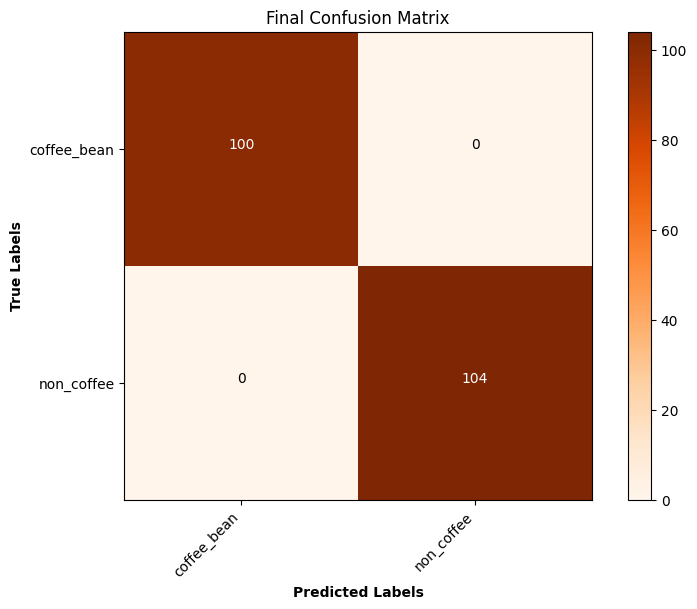

In [33]:
# Final confusion matrix
final_confusion_mtx = confusion_matrix(test_labels, test_predictions)

# Plot final confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(final_confusion_mtx, interpolation="nearest", cmap=plt.cm.Oranges)
plt.title("Final Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(eye_detect_labels.keys()))
plt.xticks(tick_marks, eye_detect_labels.keys(), rotation=45, ha='right')
plt.yticks(tick_marks, eye_detect_labels.keys())
fmt = ".2f" if False else "d"
thresh = final_confusion_mtx.max() / 2.
for i, j in itertools.product(range(final_confusion_mtx.shape[0]), range(final_confusion_mtx.shape[1])):
    plt.text(j, i, format(final_confusion_mtx[i, j], fmt), horizontalalignment="center",
             color="white" if final_confusion_mtx[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel("True Labels", fontweight="bold")
plt.xlabel("Predicted Labels", fontweight="bold")
plt.show()

In [34]:
# Simpan final confusion matrix sebagai gambar
final_confusion_mtx = confusion_matrix(test_labels, test_predictions)
save_confusion_matrix_image(final_confusion_mtx, destination_dir_confusion, is_final=True)

# Simpan Model

In [35]:
# Save model
trained_model.save("model_Inception.h5")
print("Model berhasil disimpan")

Model berhasil disimpan


In [36]:
# Tampilkan berat model
print(f"Berat model Inception : {os.path.getsize('model_Inception.h5') / 1e6:.2f} MB")

Berat model Inception : 92.04 MB
